문제 정의 :

특정한 목적을 가진 지역에서의 토양의 오염물질들을 분석하여 해당 물질들에 대하여 미리 예상하고 대비할 수 있도록 한다.

따라서 특정 목적을 가진 지역에서의 검출될 오염 물질들의 연관성을 확인해야한다.

간단하게 예상되는 결과로는 교통관련 지역에서는 다른 목적을 가진 지역에 비해 휘발유에 첨가된 납이 많이 배출될 것으로 예상되고 배기가스에 함유된 카드뮴 또한 납과 연관성이 있으므로 납이 배출된 지역에서 카드뮴의 오염도도 높을 것으로 예상한다.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("./환경부 국립환경과학원_토양오염실태조사 결과_20211231.csv")
# 토양오염실태조사 데이터셋에서 여러 목적을 가진 지역들에서의 검출된 오염물질들의 양 데이터를 통해 
# 앞으로의 토양오염을 예상하고 대비 할 수 있다.

df.head()
# 가장 위의 5개의 데이터를 확인해본다.

,년도,지점명칭,목적,지목,지역,면적(제곱미터),시료깊이(m),카드뮴(mg_kg),구리(mg_kg),비소(mg_kg),...,벤젠(mg_kg),톨루엔(mg_kg),에틸벤젠(mg_kg),크실렌(mg_kg),석유계총탄화수소(TPH)(mg_kg),트리클로로에틸렌(TCE)(mg_kg),테트라클로로에틸렌(PCE)(mg_kg),벤조(a)피렌(mg_kg),12디클로로에탄(mg_kg),수소이온농도(pH)
0,2021,알파색채(주),산업단지 및 공장지역,대지(2지역),2지역,374.0,0.3~3,1.77,75.6,8.12,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,7.3
1,2021,평화당인쇄(주),산업단지 및 공장지역,대지(2지역),2지역,297.0,0.3~3,0.47,10.8,8.23,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,7.6
2,2021,101경비단,교통관련시설지역,대지(2지역),2지역,50.0,0.3~3,0.41,13.1,6.79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,8.2
3,2021,(주)대양씨앤씨 사직주유소,노후·방치 주유소 지역,주유소용지,3지역,603.0,0.3~5,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,10.4
4,2021,나경운수,교통관련시설지역,대지(2지역),2지역,81.0,0.3~1,1.21,50.8,6.55,...,0.0,2.1,0.2,0.1,0.0,0.0,0.0,NaN,0.0,11.8


In [3]:
df.info()
# info 들을 확인해본다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3397 entries, 0 to 3396
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   년도                         3397 non-null   int64  
 1   지점명칭                       3397 non-null   object 
 2   목적                         3397 non-null   object 
 3   지목                         3397 non-null   object 
 4   지역                         3397 non-null   object 
 5   면적(제곱미터)                   3397 non-null   float64
 6   시료깊이(m)                    3397 non-null   object 
 7   카드뮴(mg_kg)                 3257 non-null   float64
 8   구리(mg_kg)                  3258 non-null   float64
 9   비소(mg_kg)                  3252 non-null   float64
 10  수은(mg_kg)                  3247 non-null   float64
 11  납(mg_kg)                   3250 non-null   float64
 12  6가크롬(mg_kg)                3237 non-null   float64
 13  아연(mg_kg)                  3265 non-null   float

총 데이터가 3397개가 있는것을 확인 할 수 있다.

In [4]:
df.isnull().sum()
# 비어있는 데이터들을 확인해본다.

년도                              0
지점명칭                            0
목적                              0
지목                              0
지역                              0
면적(제곱미터)                        0
시료깊이(m)                         0
카드뮴(mg_kg)                    140
구리(mg_kg)                     139
비소(mg_kg)                     145
수은(mg_kg)                     150
납(mg_kg)                      147
6가크롬(mg_kg)                   160
아연(mg_kg)                     132
니켈(mg_kg)                     140
불소(mg_kg)                    2064
유기인(mg_kg)                   2721
폴리클로리네이티드비페닐(PCBs)(mg_kg)    2711
시안(mg_kg)                    1236
페놀류(mg_kg)                   2282
벤젠(mg_kg)                    1527
톨루엔(mg_kg)                   1527
에틸벤젠(mg_kg)                  1527
크실렌(mg_kg)                   1527
석유계총탄화수소(TPH)(mg_kg)         1594
트리클로로에틸렌(TCE)(mg_kg)         1748
테트라클로로에틸렌(PCE)(mg_kg)        1748
벤조(a)피렌(mg_kg)               3192
12디클로로에탄(mg_kg)              1734
수소이온농도(pH)    

비어있는 데이터가 많은 불소 부터 12디클로로에탄까지의 데이터를 지워준다.

In [5]:
df = df.drop(df.columns[15:29], axis=1)

In [6]:
df.describe()
# describe 정보들을 확인해본다.

,년도,면적(제곱미터),카드뮴(mg_kg),구리(mg_kg),비소(mg_kg),수은(mg_kg),납(mg_kg),6가크롬(mg_kg),아연(mg_kg),니켈(mg_kg),수소이온농도(pH)
count,3397.0,3.397000e+03,3257.000000,3258.000000,3252.000000,3247.000000,3250.000000,3237.000000,3265.000000,3257.000000,3397.000000
mean,2021.0,3.269284e+04,0.620473,32.248926,5.362786,0.052738,30.120031,0.065431,132.121991,17.702303,7.459523
std,0.0,1.103251e+05,0.916080,134.572626,13.881072,0.245044,100.103330,0.374018,458.996114,19.135225,1.138550
min,2021.0,1.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.600000,0.000000,3.200000
25%,2021.0,1.231000e+03,0.000000,9.900000,0.000000,0.000000,13.000000,0.000000,65.900000,6.900000,6.600000
50%,2021.0,3.821000e+03,0.270000,17.900000,3.765000,0.010000,18.800000,0.000000,87.400000,12.300000,7.500000
75%,2021.0,1.657880e+04,0.910000,32.875000,6.550000,0.050000,27.800000,0.000000,119.900000,23.100000,8.400000
max,2021.0,1.811265e+06,18.290000,5919.200000,394.050000,8.440000,3973.400000,11.200000,15184.100000,384.100000,11.900000


In [7]:
df = df.fillna(0)
# 비어있는 데이터에 0을 채워넣어준다.

#columns_to_check = ['카드뮴(mg_kg)', '구리(mg_kg)', '비소(mg_kg)','수은(mg_kg)','납(mg_kg)','6가크롬(mg_kg)','아연(mg_kg)','니켈(mg_kg)']
#mask = df[columns_to_check].eq(0).any(axis=1)
#df = df[~mask]
# 값이 0인 데이터를 지워준다.
## 0이 하나라도 있는경우를 전부 지웠을때 남는 데이터셋이 67개밖에 남지 않아서 시행하지 않음

In [8]:
df.isnull().sum()

년도             0
지점명칭           0
목적             0
지목             0
지역             0
면적(제곱미터)       0
시료깊이(m)        0
카드뮴(mg_kg)     0
구리(mg_kg)      0
비소(mg_kg)      0
수은(mg_kg)      0
납(mg_kg)       0
6가크롬(mg_kg)    0
아연(mg_kg)      0
니켈(mg_kg)      0
수소이온농도(pH)     0
dtype: int64

비어있는 데이터가 없는 것을 볼 수 있다.

각 목적별 데이터 수를 확인해 보자

Text(0.5, 1.0, 'purpose')

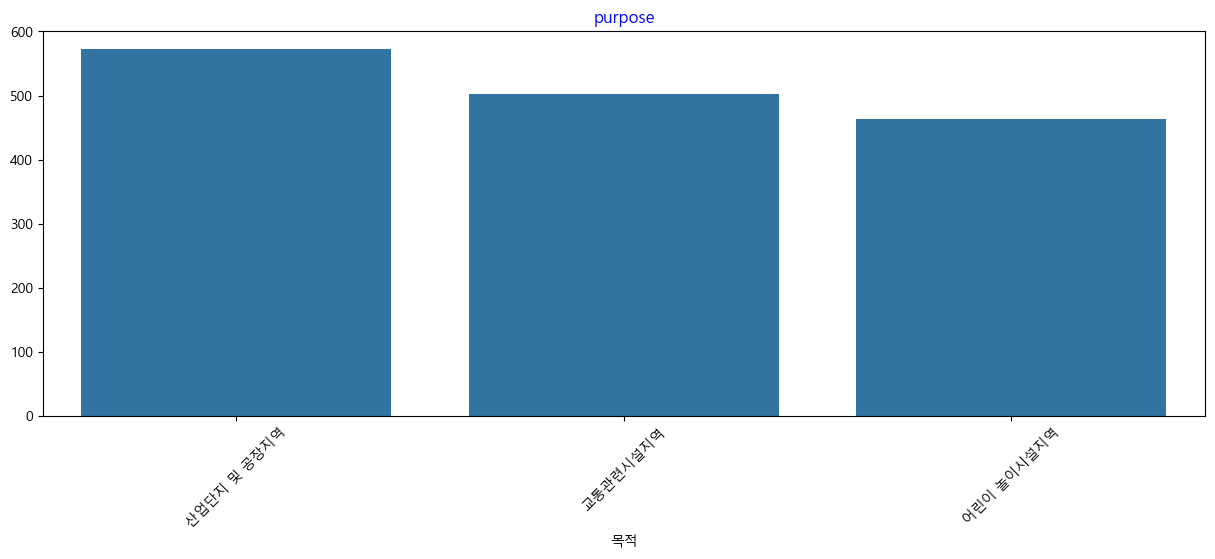

In [32]:
import seaborn as sns

# 한글 폰트 설정 (맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
top = df['목적'].value_counts()
# 목적들에 대하여 counts 해보자

plt.figure(figsize=(15,5))
# 그래프의 가로 세로 크기를 지정 (가로, 세로)

sns.barplot(x=top[:10].index,y=top[:10].values)
# 막대 그래프 상위 10개의 목적들에 대하여 // x 축을 상위 목적 10개의 인덱스로 접근

plt.xticks(rotation=45)
# x축의 막대그래프 기울기

plt.title('purpose',color = 'blue')
# 타이틀 제목

가장 값이 많은 데이터 3개만 추출하여 사용한다.

Text(0.5, 1.0, 'Top purpose')

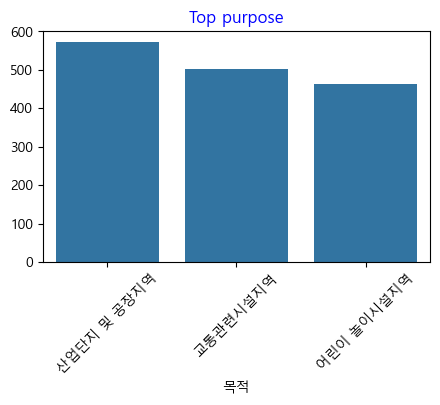

In [11]:
df = df[(df['목적'] == '산업단지 및 공장지역') | (df['목적'] == '교통관련시설지역') | (df['목적'] == '어린이 놀이시설지역')]
#가장 값이 많은 데이터 3개만 추출

top = df['목적'].value_counts()

plt.figure(figsize=(5,3))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top purpose',color = 'blue')
#추출한 데이터 3개만 표로 확인한다.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1539 entries, 0 to 3394
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   년도           1539 non-null   int64  
 1   지점명칭         1539 non-null   object 
 2   목적           1539 non-null   object 
 3   지목           1539 non-null   object 
 4   지역           1539 non-null   object 
 5   면적(제곱미터)     1539 non-null   float64
 6   시료깊이(m)      1539 non-null   object 
 7   카드뮴(mg_kg)   1539 non-null   float64
 8   구리(mg_kg)    1539 non-null   float64
 9   비소(mg_kg)    1539 non-null   float64
 10  수은(mg_kg)    1539 non-null   float64
 11  납(mg_kg)     1539 non-null   float64
 12  6가크롬(mg_kg)  1539 non-null   float64
 13  아연(mg_kg)    1539 non-null   float64
 14  니켈(mg_kg)    1539 non-null   float64
 15  수소이온농도(pH)   1539 non-null   float64
dtypes: float64(10), int64(1), object(5)
memory usage: 204.4+ KB


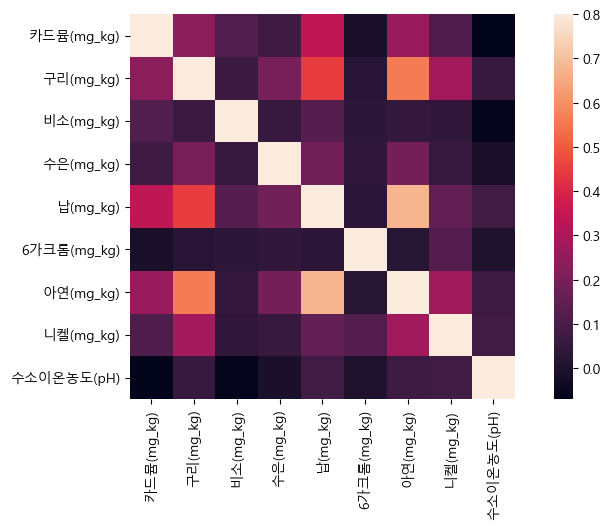

In [13]:
df_modified = df.iloc[:, 7:16].join(df.iloc[:, 18:])
# 모듣 행을 선택, 열은 index가 8~16 + 18 인 값들 추출

corrmat = df_modified.corr()
# 상관 관계를 행렬로 표시하는 과정!!!!

f, ax = plt.subplots(figsize=(10, 5))
# f는 캠버스, ax는 개별 차트
# plt.subplots(figsize=(전체 크기, 블럭크기))

#sns.heatmap(corrmat, vmax=1, vmin=-1, square=True);
sns.heatmap(corrmat, vmax=0.8, square=True);

예상한 것과 비슷하게 카드뮴과 납의 연관도는 나름 높은 편으로 볼 수 있다.

추가로 납과 아연이 매우 높은 연관성을 보이고 구리와 아연도 연관도가 나름 있어보인다.

카드뮴과 수소이온농도는 높은 역 연관성을 보인다.

<Axes: xlabel='수소이온농도(pH)'>

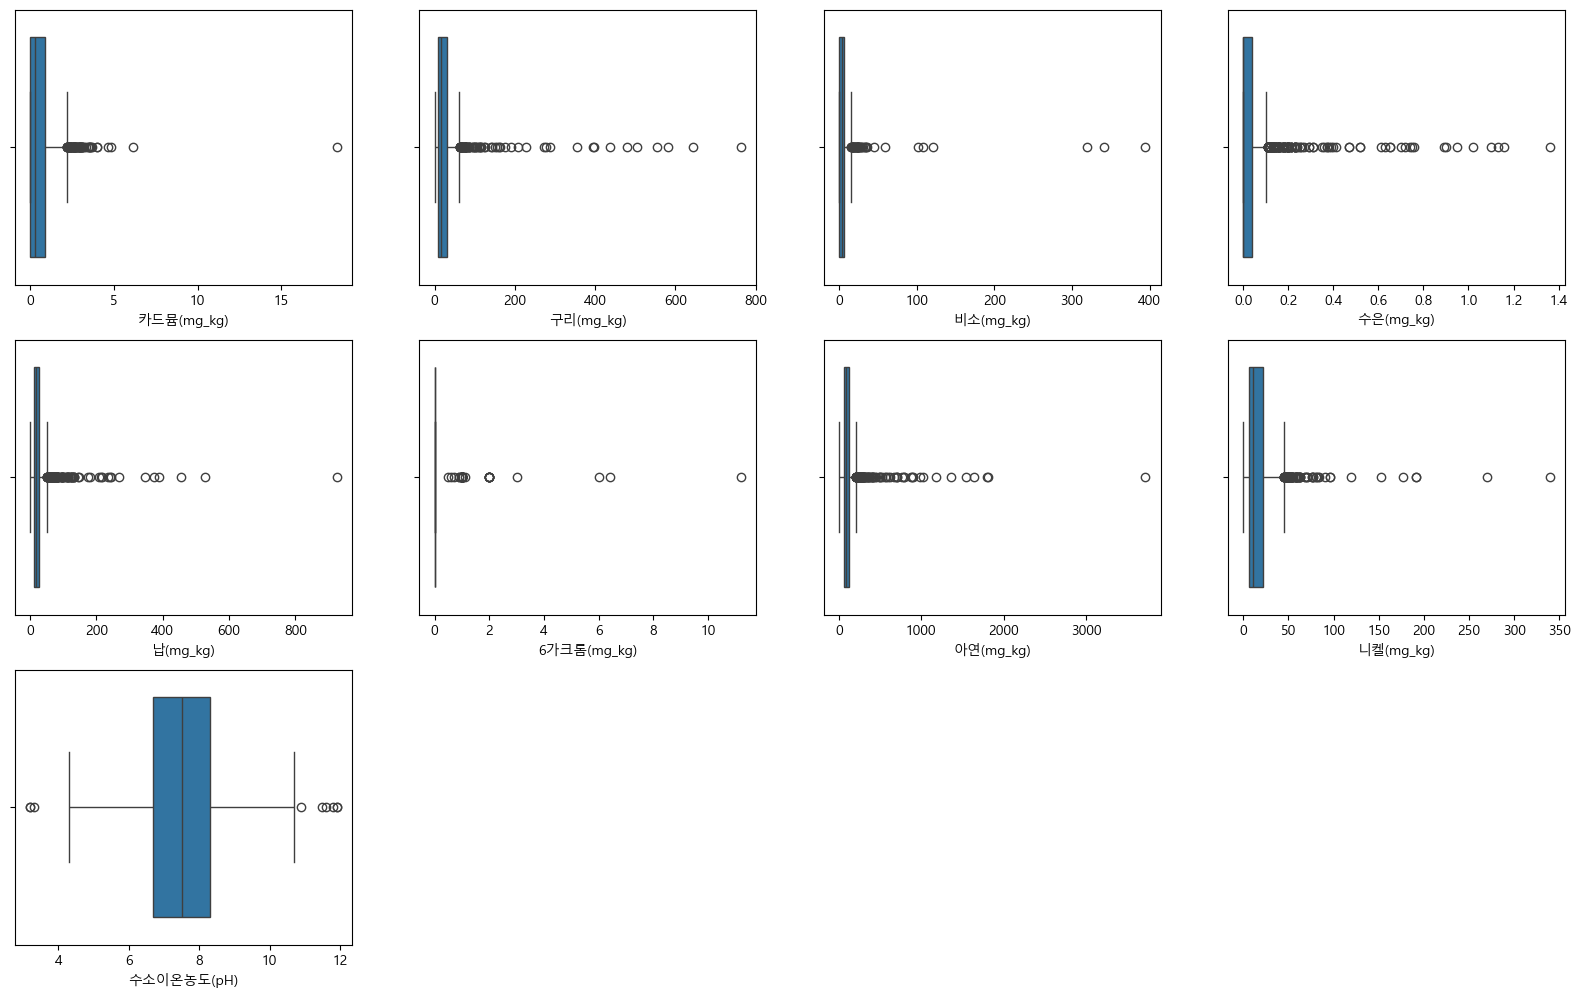

In [14]:
# 데이터들의 boxplot 을 그려본다.
plt.figure(figsize=(20,25))

plt.subplot(6,4,1)
sns.boxplot(x = '카드뮴(mg_kg)', data = df)

plt.subplot(6,4,2)
sns.boxplot(x = '구리(mg_kg)', data = df)

plt.subplot(6,4,3)
sns.boxplot(x = '비소(mg_kg)', data = df)

plt.subplot(6,4,4)
sns.boxplot(x = '수은(mg_kg)', data = df)

plt.subplot(6,4,5)
sns.boxplot(x = '납(mg_kg)', data = df)

plt.subplot(6,4,6)
sns.boxplot(x = '6가크롬(mg_kg)', data = df)

plt.subplot(6,4,7)
sns.boxplot(x = '아연(mg_kg)', data = df)

plt.subplot(6,4,8)
sns.boxplot(x = '니켈(mg_kg)', data = df)

plt.subplot(6,4,9)
sns.boxplot(x = '수소이온농도(pH)', data = df)



In [15]:
#df.head()
#for i in range(7, 15):
#    column_name = df.columns[i]  # 해당 열의 이름을 가져옵니다.
#    df[column_name] = df.iloc[:, i] / df.iloc[:, 5]
# 값이 너무 치우쳐져있어 면적당 검출양으로 해보았지만 더욱더 값이 치우쳐져 버리는현상이 발생

범위가 비슷한 열을 여러개 선택하기.

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
# LabelEncoder를 사용하여 목적 열을 숫자로 변환합니다.

X = df.loc[:, ('목적','납(mg_kg)','아연(mg_kg)','카드뮴(mg_kg)','수소이온농도(pH)')]
# 데이터프레임으로부터 필요한 열들을 선택합니다.

# 목적 열을 제외한 나머지 열들은 특성으로 사용됩니다.

y = df['목적']

X['목적'] = le.fit_transform(X['목적'])

y = le.transform(y)

몇개로 클러스터링 할것인지 설정한다.
목적을 3개만 사용하기 때문에 클러스터링을 3으로 준다

In [17]:
from sklearn.cluster import KMeans

# 클러스터의 개수와 랜덤 시드 값을 설정합니다.
nclusters = 3  # 클러스터의 개수
seed = 0  # 랜덤 시드 값

# KMeans 모델을 생성합니다.
km = KMeans(n_clusters=nclusters, random_state=seed)

# 데이터를 사용하여 KMeans 클러스터링을 수행합니다.
km.fit(X)

# 각 데이터 포인트에 대해 클러스터를 예측합니다.
y_cluster_kmeans = km.predict(X)

# 각 데이터 포인트가 속한 클러스터를 출력합니다.
y_cluster_kmeans

array([2, 0, 0, ..., 0, 0, 0])

예측된 클러스트를 배열로 확인하고

정확도를 알아보기 위해 실루엣 점수를 확인한다.

In [18]:
from sklearn import metrics

# 클러스터링 결과에 대한 실루엣 점수를 계산합니다.
# X: 특성 데이터
# y_cluster_kmeans: KMeans 클러스터링 결과
score = metrics.silhouette_score(X, y_cluster_kmeans)

# 실루엣 점수를 출력합니다.
score

0.8583246589954093

0.8583 으로 1에 가까움으로 상당히 높은 실루엣 점수를 받았음을 확인 할 수 있다.

클러스터링에 적합한 데이터라고 볼 수 있다.

최적의 클러스터링 값을 구해보기위해 엘보우 방법을 사용하여 클러스터 수에 따른 WCSS 를 그래프로 그려본다.

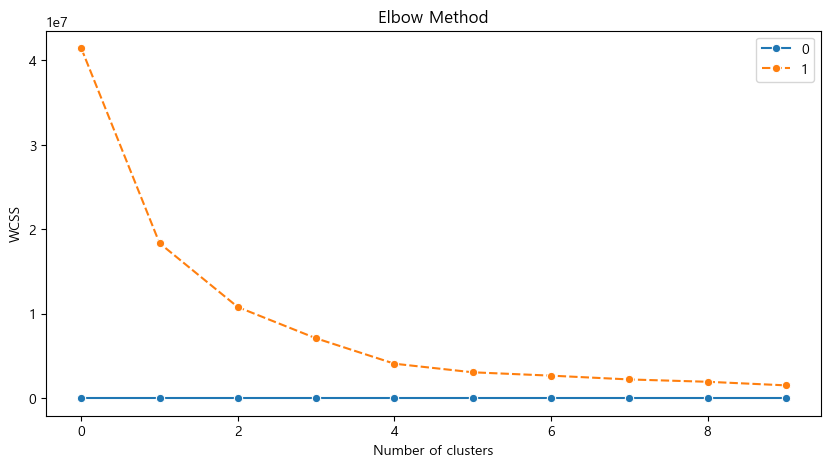

In [19]:
from sklearn.cluster import KMeans

# 군집 내 제곱 합을 저장할 빈 리스트를 생성합니다.
wcss = []

# 클러스터의 개수를 1부터 10까지 변경하면서 KMeans 모델을 생성하고 각각의 군집 내 제곱 합을 계산합니다.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# 군집 내 제곱 합을 시각화합니다.
plt.figure(figsize=(10, 5))
sns.lineplot(data=(range(1, 11), wcss), marker='o', color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

3또는 4정도면 적절한 것으로 보인다.

따라서 이번엔 4개를 이용하여 클러스터링 시도해본다.

위에서 가장 연관성이 높게 나왔던 아연과 납의 연관성을 확인해 보겠다.

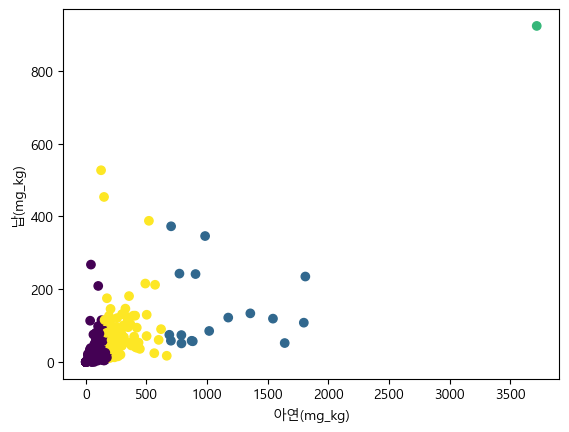

In [20]:
from sklearn.cluster import KMeans

# KMeans 모델을 생성하고 데이터를 사용하여 클러스터링을 수행합니다.
kmeans = KMeans(n_clusters=4)  # 클러스터 개수를 4로 설정합니다.
kmeans.fit(X)  # 데이터를 사용하여 KMeans 클러스터링을 수행합니다.

# 각 데이터 포인트에 대한 클러스터 레이블을 예측합니다.
labels = kmeans.predict(X)

# 데이터 포인트를 산점도로 시각화하고 클러스터 레이블에 따라 색상을 다르게 표시합니다.
plt.scatter(df['아연(mg_kg)'], df['납(mg_kg)'], c=labels)

# x축과 y축의 라벨을 설정합니다.
plt.xlabel('아연(mg_kg)')
plt.ylabel('납(mg_kg)')

# 그래프를 출력합니다.
plt.show()

아연 오염도가 높으면 납의 오염도도 높을 확률이 있다는 것을 어느정도 볼 수 있다.

하지만 확실한 연관도가 있다고는 볼 수 없다.

클러스터의 중심점으로부터 밀집이 잘 되어있는 형태로 데이터가 분포되어 있다.


In [21]:
# KMeans 모델을 사용하여 예측한 클러스터 레이블을 가져옵니다.
labels = kmeans.labels_

# 실제 라벨과 예측된 라벨이 일치하는 개수를 계산합니다.
correct_labels = sum(y == labels)

# 정확하게 라벨이 할당된 샘플의 개수를 출력합니다.
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

# 정확도 점수를 계산하여 출력합니다.
accuracy = correct_labels / float(y.size)
print('Accuracy score: {0:0.2f}'.format(accuracy))

Result: 442 out of 1539 samples were correctly labeled.
Accuracy score: 0.29


따라서 Accuracy score 역시 낮은 점수가 나왔다.

실루엣 점수가 높아도 Accuracy score은 낮을 수 있음 을 볼 수 있다.

실루엣 점수는 각 데이터 포인트가 자신의 클러스터와 얼마나 유사하는지를 측정하는 지표이지 클러스터링이 올바르게 수행 되었음을 보장하지 않는다.

이번엔 높은 역 연관성을 보인 카드뮴과 수소이온농도에 대하여 클러스터링을 진행해 보겠다.

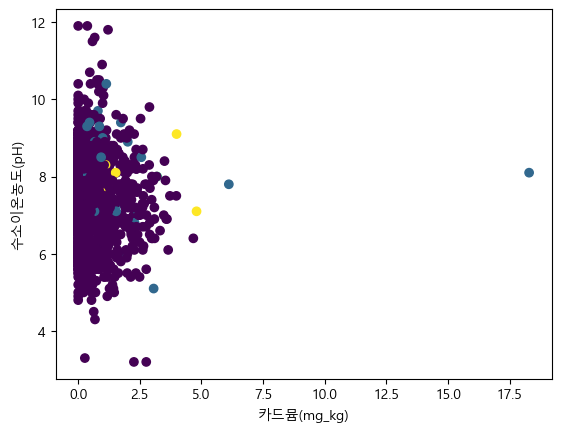

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['카드뮴(mg_kg)'],df['수소이온농도(pH)'],c = labels)
plt.xlabel('카드뮴(mg_kg)')
plt.ylabel('수소이온농도(pH)')
plt.show()

역 연관도 떄문인지 정말 인정 할 수 없는 클러스터링 결과가 나왔다.

In [23]:
# KMeans 모델을 사용하여 예측한 클러스터 레이블을 가져옵니다.
labels = kmeans.labels_

# 실제 라벨과 예측된 라벨이 일치하는 개수를 계산합니다.
correct_labels = sum(y == labels)

# 정확하게 라벨이 할당된 샘플의 개수를 출력합니다.
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

# 정확도 점수를 계산하여 출력합니다.
accuracy = correct_labels / float(y.size)
print('Accuracy score: {0:0.2f}'.format(accuracy))

Result: 499 out of 1539 samples were correctly labeled.
Accuracy score: 0.32


이전의 Accuracy score 보다 조금더 낮은 점수를 받았다.